## EDA - Exploring Emotions Dataset

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

### - Number of images per emotion:

In [ ]:
# Baseline of directoy path:
base_dir = "../raw_data"

# Let's count the amount of image in each folder:
counts = {}

for root, dirs, files in os.walk(base_dir):
    png_files = [f for f in files if f.lower().endswith(".png")] # This takes only PNG files
    if png_files:
        folder_name = os.path.basename(root)
        counts[folder_name] = len(png_files)

print(counts)


{'contempt': 208, 'fear': 570, 'anger': 890, 'surprise': 775, 'neutrality': 524, 'disgust': 439, 'sadness': 746, 'happiness': 1406}


In [17]:
# Turn into a dataframe for clarity and after to plot it:
df_count = pd.DataFrame(list(counts.items()), columns=["Emotion", "Image_Count"])

# Display and sorting it as DESC:
df_count = df_count.sort_values(by='Image_Count', ascending=False)

df_count

,Emotion,Image_Count
7,happiness,1406
2,anger,890
3,surprise,775
6,sadness,746
1,fear,570
4,neutrality,524
5,disgust,439
0,contempt,208


In [20]:
# Total images
total_img = df_counts["Image_Count"].sum()

print("Total images:", total_img)

Total images: 5558


### - Distribution of images per emotion:

/tmp/ipykernel_2740/429788149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_count, x="Image_Count", y="Emotion", palette='coolwarm')


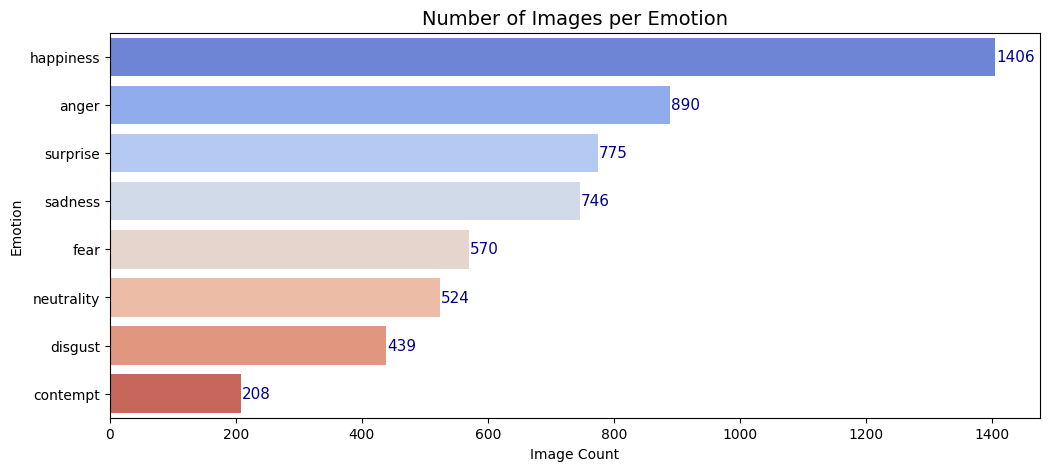

In [30]:
# Histogram / barplot of image counts per emotion
plt.figure(figsize=(12,5))
sns.barplot(data=df_count, x="Image_Count", y="Emotion", palette='coolwarm')

plt.title("Number of Images per Emotion", fontsize=14)
plt.ylabel("Emotion")
plt.xlabel("Image Count")

# Adding label to the bar chart:
for i, (count, emotion) in enumerate(zip(df_count["Image_Count"], df_count["Emotion"])):
    plt.text(count + 1, i, str(count), va='center', color='darkblue', fontsize=11)

plt.show()

### 👆👆👆

### We clearly have some IMBALANCE here, with **1.406 images of happiness** vs only **208 images of contempt**. 

-----

### - Displaying some images

In [36]:
# Function to easily display 5 pictures per emotion, once called:
def show_images(emotion, n=5):
    folder = os.path.join(base_dir, emotion)
    files = [f for f in os.listdir(folder) if f.lower().endswith('.png')][:n]
    plt.figure(figsize=(15, 3))
    for i, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = mpimg.imread(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{emotion}")
        plt.axis('off')
    plt.suptitle(f"Emotion: {emotion.upper()}", fontsize=15)
    plt.tight_layout()
    plt.show()

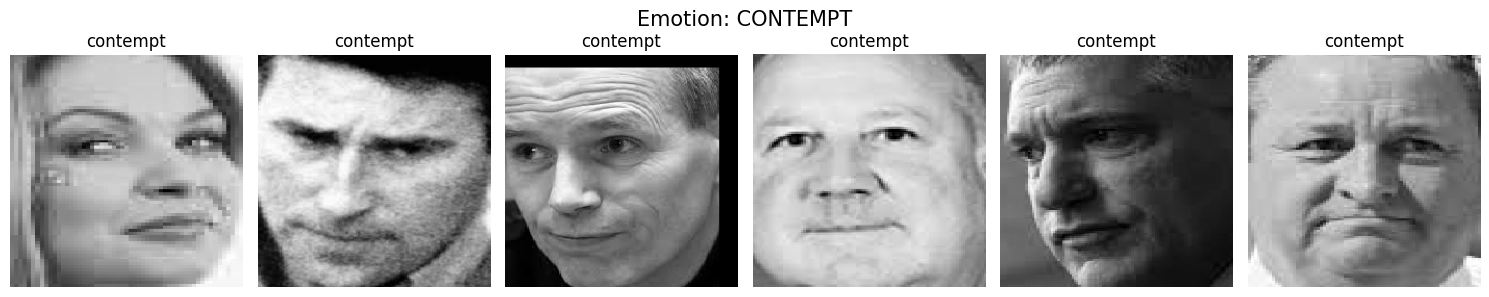

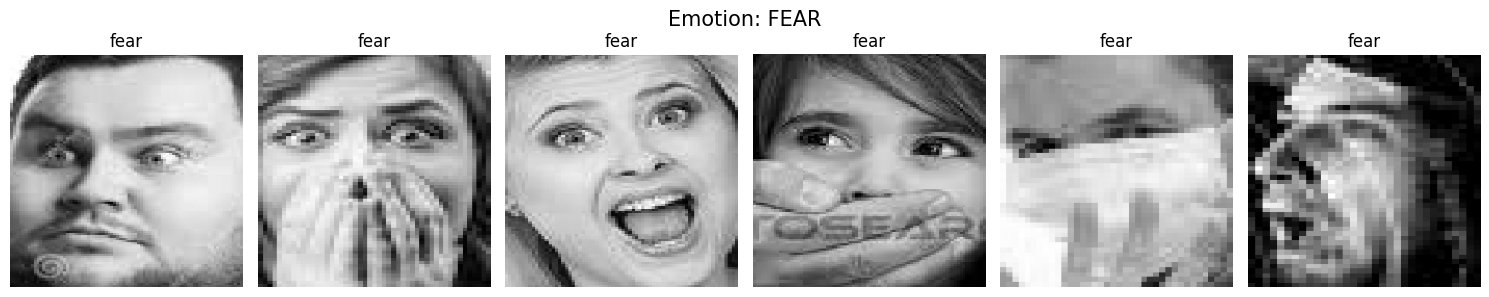

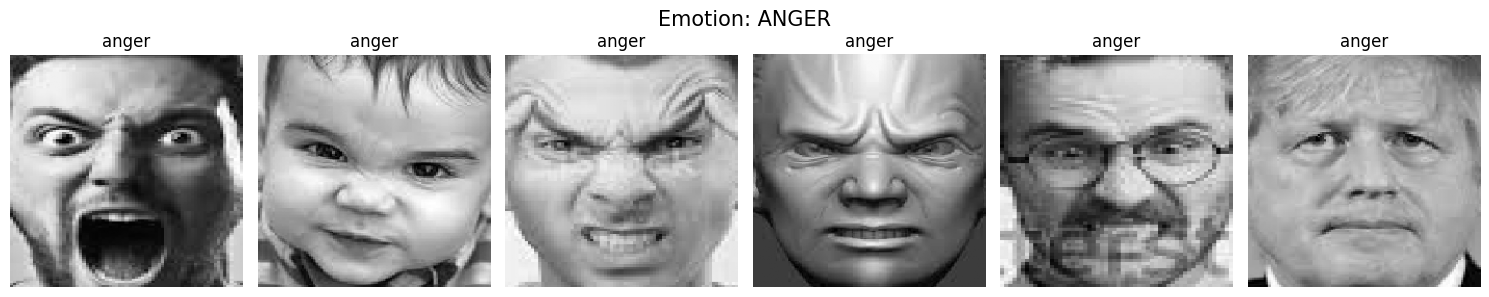

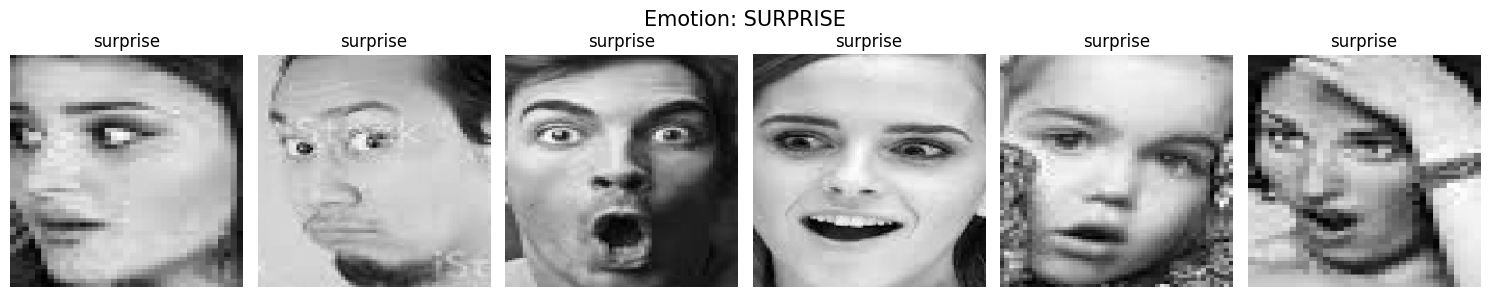

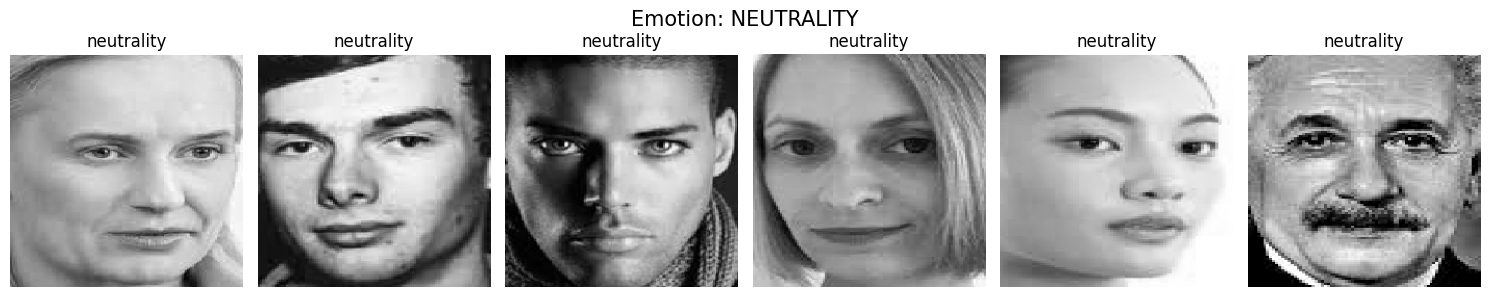

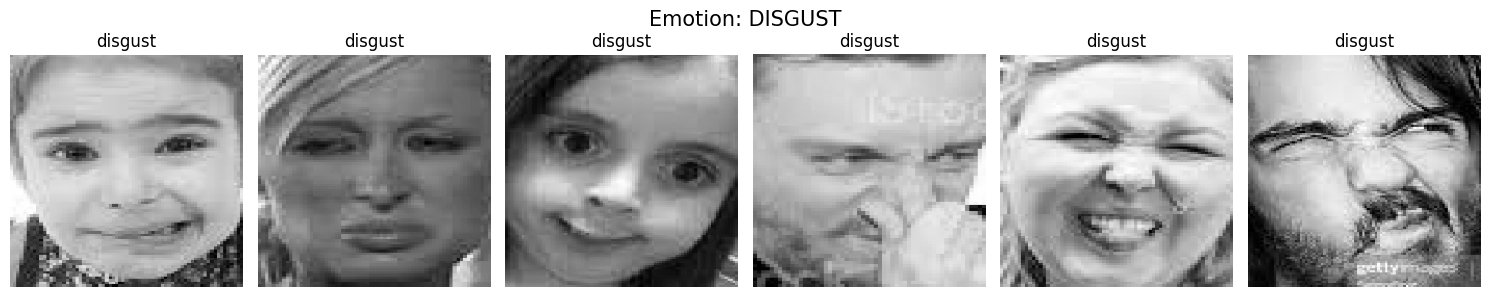

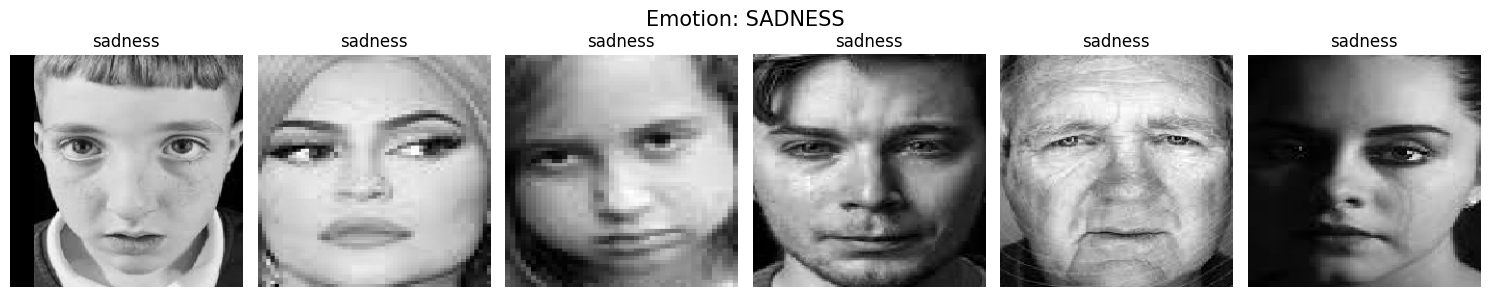

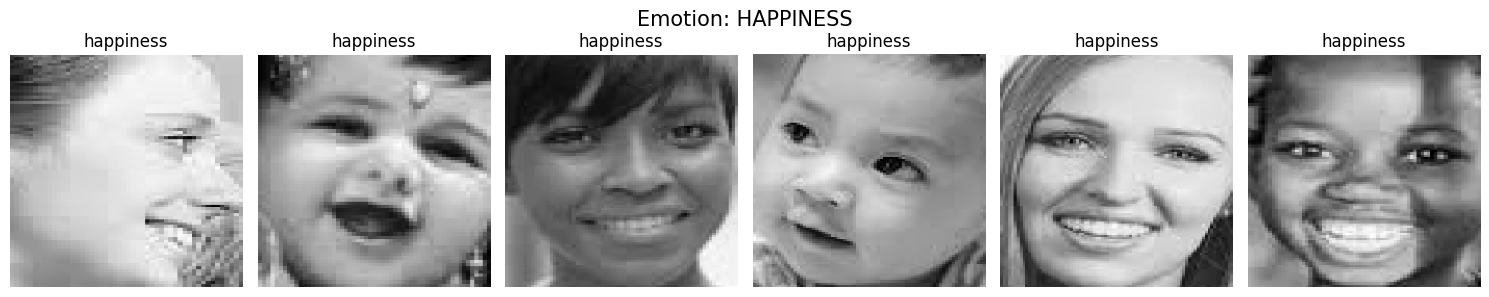

In [42]:
# Usage for all emotions:
for emotion in df_counts["Emotion"]:
    show_images(emotion, n=6)

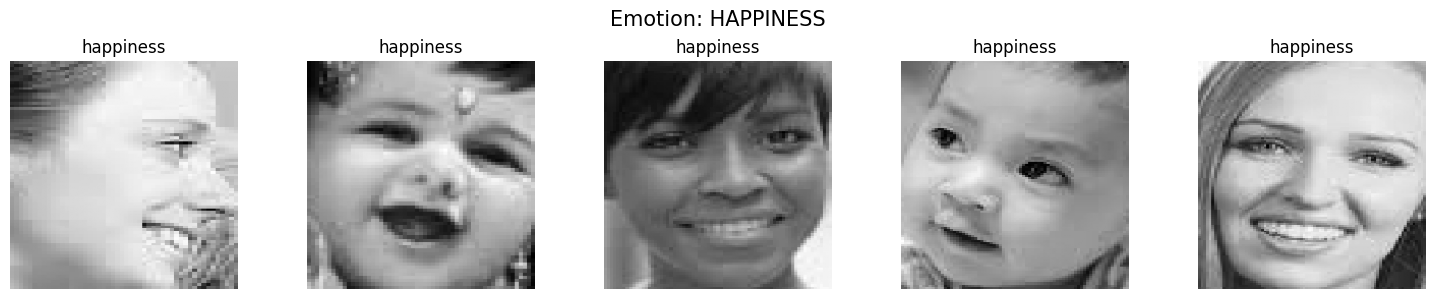

In [40]:
## Testing:
show_images('happiness')

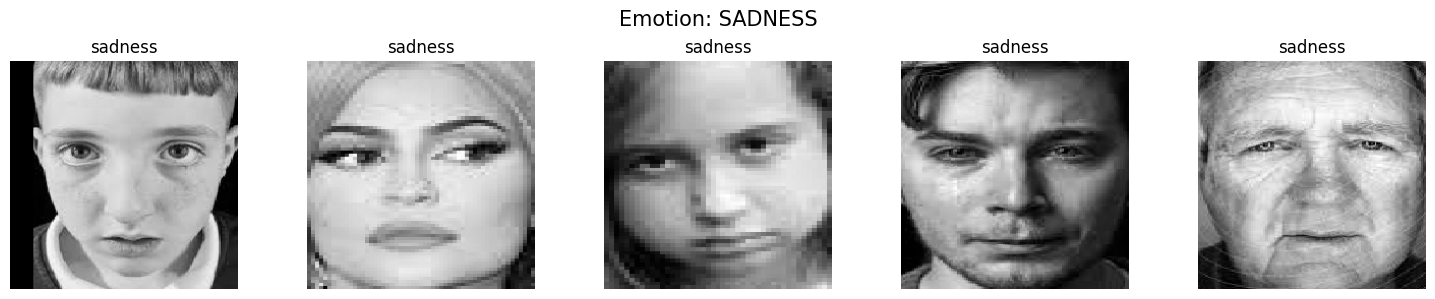

In [41]:
## Testing:
show_images('sadness')

---

### - Exploring properties (shape, resolution, etc.)

In [44]:
data = []

for emotion in os.listdir(base_dir):
    folder = os.path.join(base_dir, emotion)
    if os.path.isdir(folder):
        for file in os.listdir(folder):
            if file.endswith(".png"):
                path = os.path.join(folder, file)
                try:
                    img = Image.open(path)
                    data.append({
                        "emotion": emotion,
                        "width": img.width,
                        "height": img.height,
                        "mode": img.mode  # e.g. RGB, L (grayscale)
                    })
                except:
                    print(f"Error reading {path}")

df = pd.DataFrame(data)
df.head()


,emotion,width,height,mode
0,contempt,224,224,L
1,contempt,224,224,L
2,contempt,224,224,L
3,contempt,224,224,L
4,contempt,224,224,L


In [46]:
# Distribution of image sizes
df["resolution"] = df["width"].astype(str) + "x" + df["height"].astype(str)
print(df["resolution"].value_counts().head(10))

# Average size per emotion
print(df.groupby("emotion")[["width","height"]].mean())

resolution
224x224    5558
Name: count, dtype: int64
            width  height
emotion                  
anger       224.0   224.0
contempt    224.0   224.0
disgust     224.0   224.0
fear        224.0   224.0
happiness   224.0   224.0
neutrality  224.0   224.0
sadness     224.0   224.0
surprise    224.0   224.0


### Basically, all the images are 224 x 224.

---

To save it to GitHub:

- git status
- git add <file name>
- git commit -m 'message'
- git push -u origin <branch name>